<a href="https://colab.research.google.com/github/NOURSHILI-debug/Language-detection-using-NLP/blob/main/LanguageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

In [ ]:

df = pd.read_csv(
    'Language_Detection(in).csv',
    header=None,
    names=['text', 'language'],
    sep=r',(?=[^,]+$)', # split ONLY on last comma
     encoding='latin1'
)


/tmp/ipython-input-274633249.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


In [ ]:
df.head(10)


,text,language
0,Text,Language;;;
1,"Nature, in the broadest sense, is the natural,...",English;;;
2,"""""""Nature"""" can refer to the phenomena of the ...","English"";;;"
3,"The study of nature is a large, if not the onl...",English;;;
4,"Although humans are part of nature, human acti...",English;;;
5,"""[1] The word nature is borrowed from the Old ...","English"";;;"
6,"[2] In ancient philosophy, natura is mostly us...",English;;;
7,"""[3][4]",None
8,"The concept of nature as a whole, the physical...","English"";;;"
9,During the advent of modern scientific method ...,English;;;


In [ ]:
df["language"].value_counts()

,count
language,
English;;;,1174
French;;;,993
Spanish;;;,785
Russian;;;,682
Italian;;;,655
...,...
Russian;;,1
"y esa es una gran responsabilidad"""" [7]â",1
Danish;;,1


In [ ]:
df['language'] = (
    df['language']
    .astype(str)
    .str.strip()
    .str.replace(r'[^\wÀ-ÿ;]', '', regex=True)
)


In [ ]:
df = df[df['language'].isin(valid_languages)]


In [ ]:
df['language'].value_counts()


In [ ]:
X=df['text']
y=df['language']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
print (y)

[89 72 70 ... 88 88 88]


In [ ]:
txt=[]
for text in X:
  text=re.sub(r'[\[\]]', ' ', text)
  txt.append(text)

['Text', 'Nature, in the broadest sense, is the natural, physical, material world or universe.', '"""Nature"" can refer to the phenomena of the physical world, and also to life in general.', 'The study of nature is a large, if not the only, part of science.', 'Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.', '" 1  The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or ""essential qualities, innate disposition"", and in ancient times, literally meant ""birth"".', ' 2  In ancient philosophy, natura is mostly used as the Latin translation of the Greek word physis (Ï\x86Ï\x8dÏ\x83Î¹Ï\x82), which originally related to the intrinsic characteristics that plants, animals, and other features of the world develop of their own accord.', '" 3  4 ', 'The concept of nature as a whole, the physical universe, is one of several expansions of the original notion; 1  it began with ce

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["chien chat poisson ", "chien chat chat " , "poisson oiseau oiseau"]
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)
print(cv.get_feature_names_out(texts))
print(cv_fit.toarray())

['chat' 'chien' 'oiseau' 'poisson']
[[1 1 0 1]
 [2 1 0 0]
 [0 0 2 1]]


In [26]:
X=cv.fit_transform(txt).toarray()
X.shape

(10772, 28702)

In [27]:
import gc
del txt
gc.collect()

382

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np
y=y.astype(np.int8)
X=X.astype(np.int16)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [32]:
y_pred=model.predict(x_test)

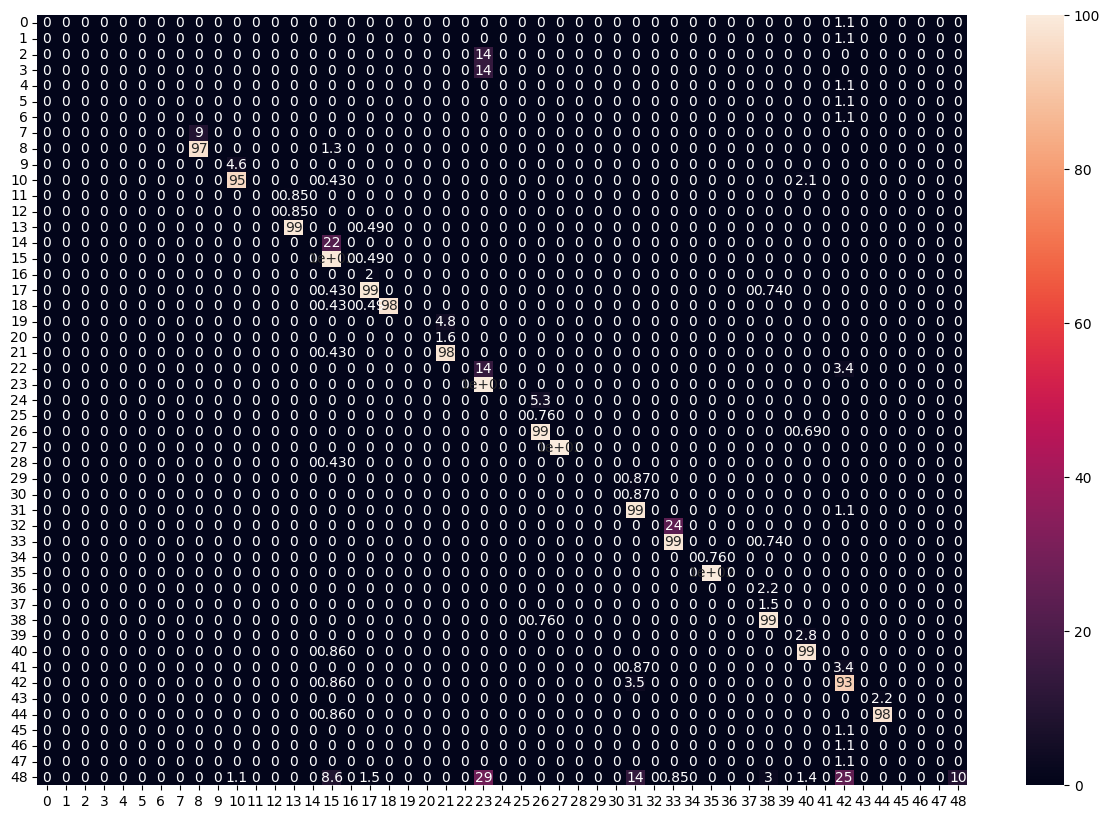

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
ac= 100*accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm=100*cm/ cm.sum(axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [39]:
np.unique(y_test)

array([ 14,  23,  37,  38,  40,  57,  59,  62,  63,  64,  66,  67,  68,
        69,  70,  72,  73,  74,  76,  78,  79,  81,  82,  83,  84,  85,
        86,  88,  89,  90,  91,  92,  93,  94,  95,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 108, 111, 116, 118, 120], dtype=int8)

In [41]:

def predict(text):
  x = cv.transform([text]).toarray()
  lang = model.predict(x)
  lang = le.inverse_transform(lang)
  print("The langauge is in",lang[0])

In [42]:
predict("Est-ce que cet exercice vous a permis d'avoir un aperçu introductif au traitement naturel du langage ?")

The langauge is in French;;;


In [43]:
predict("Did this exercise give you an introductory overview to natural language processing?")
predict("Bu alıştırma size doğal dil işlemeye giriş niteliğinde bir genel bakış sağladı mı?")
predict("؟ةيعيبطلا ةغللا ةجلاعم لوح ةيديهمت ةماع ةرظن نيرمتلا اذه كاطعأ له")
predict("¿Este ejercicio le brindó una introducción al procesamiento del lenguaje natural?")
predict("ഈ വ്യായാമം നിങ്ങൾക്ക് സ്വാഭാവ്ിക ഭാഷാ പ്രാസ്സ്ിംഗിന്റെ ഒരു ആമുഖ അവ്പ ാകനം നൽകിപയാ?")
predict("Это упражнение дало вам вводный обзор обработки естественного языка?")

The langauge is in English;;;
The langauge is in Turkish;;;
The langauge is in English;;;
The langauge is in Spanish;;;
The langauge is in English;;;
The langauge is in English;;;
